In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables

print(diabetes_dataset.keys())

data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]
targets

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [4]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()

targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [6]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape = (train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [7]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model

model.compile(optimizer="adam", loss="mse", metrics=["mse"])

In [9]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [10]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)


45/1 - 0s - loss: 0.7801 - mse: 0.8768


[0.8767623212602403, 0.87676233]

#### Plot the learning curves

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

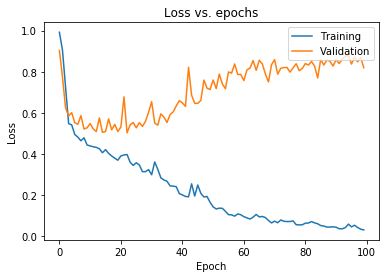

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [14]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
         Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
         Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
         Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
         Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
         Dropout(rate),
        Dense(1)
    ])
    return model

In [15]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5,0.3)

In [16]:
# Compile the model

model.compile(optimizer="adam", loss="mse", metrics=["mse"])

In [17]:
# Train the model, with some of the data reserved for validation


history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [18]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.4769 - mse: 0.5413


[0.5479940818415747, 0.541296]

#### Plot the learning curves

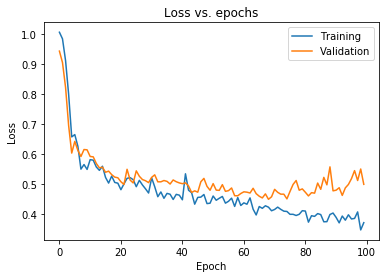

In [19]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [20]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training...")
    
    def on_epoch_begin(self, epoch, logs=None):
        print(f"epoch started {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"on_train_batch_begin started {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"on_train_batch_end started {batch}")
    
    def on_epoch_end(self, epoch, logs=None):
        print(f"epoch end {epoch}")
        
    def on_train_end(self, logs=None):
        print("Starting end")



In [21]:
# Re-build the model

model = get_regularised_model(1e-5,0.3)

In [22]:
# Compile the model

model.compile(optimizer="adam", loss="mse")

#### Train the model with the callback

In [23]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=3, validation_split=0.15, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting training...
epoch started 0
on_train_batch_begin started 0
on_train_batch_end started 0
on_train_batch_begin started 1
on_train_batch_end started 1
on_train_batch_begin started 2
on_train_batch_end started 2
epoch end 0
epoch started 1
on_train_batch_begin started 0
on_train_batch_end started 0
on_train_batch_begin started 1
on_train_batch_end started 1
on_train_batch_begin started 2
on_train_batch_end started 2
epoch end 1
epoch started 2
on_train_batch_begin started 0
on_train_batch_end started 0
on_train_batch_begin started 1
on_train_batch_end started 1
on_train_batch_begin started 2
on_train_batch_end started 2
epoch end 2
Starting end


In [24]:
# Evaluate the model

# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing...")       
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"on_train_batch_begin started {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"on_test_batch_end started {batch}")
        
    def on_test_end(self, logs=None):
        print("finish testing")

In [25]:
# Make predictions with the model
model.evaluate(test_data, test_targets, verbose=2, callbacks=[TestingCallback()])


Starting testing...
on_train_batch_begin started 0
on_test_batch_end started 0
on_train_batch_begin started 1
on_test_batch_end started 1
45/1 - 0s - loss: 0.9468
finish testing


0.9953157093789843

In [26]:
# Evaluate the model

# Write a custom callback
from tensorflow.keras.callbacks import Callback

class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting Prediction...")       
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction started {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction started {batch}")
        
    def on_predict_end(self, logs=None):
        print("finish Prediction")

In [ ]:
model.predict(test_data, verbose=2, callbacks=[PredictionCallback()])

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [31]:
# Re-train the unregularised model

unregularized_model = get_model()
unregularized_model.compile(optimizer="adam", loss="mse")
unreg_history = unregularized_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, 
                          batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping()])

In [32]:
# Evaluate the model on the test set
unregularized_model.evaluate(test_data, test_targets, verbose=2)


45/1 - 0s - loss: 0.5170


0.5954015056292216

In [33]:
# Re-train the regularised model
regularized_model = get_regularised_model(1e-5,0.3)
regularized_model.compile(optimizer="adam", loss="mse")
reg_history = regularized_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, 
                          batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping()])

In [34]:
# Evaluate the model on the test set

regularized_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.5765


0.5897390868928697

#### Plot the learning curves

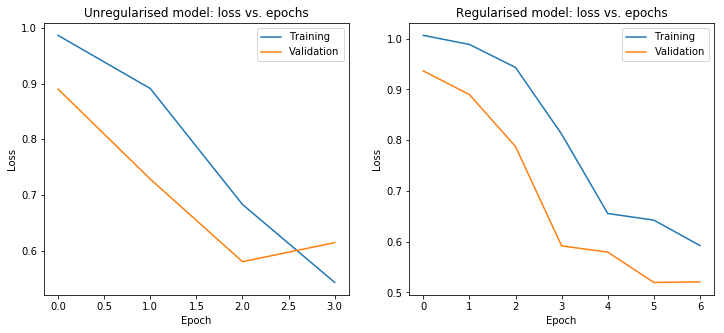

In [35]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

In [36]:
#retrain with patiance
# Re-train the unregularised model

unregularized_model = get_model()
unregularized_model.compile(optimizer="adam", loss="mse")
unreg_history = unregularized_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, 
                          batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])
# Evaluate the model on the test set
unregularized_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.3944


0.5297673722108205

In [37]:
# Re-train the regularised model
regularized_model = get_regularised_model(1e-5,0.3)
regularized_model.compile(optimizer="adam", loss="mse")
reg_history = regularized_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, 
                          batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])
# Evaluate the model on the test set

regularized_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.4653


0.5500901553365919

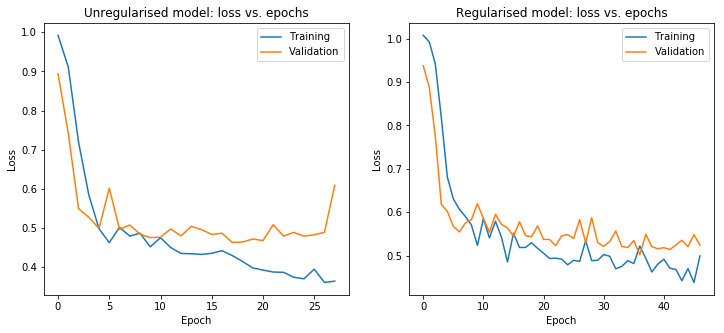

In [38]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

we see overfitting with petiance 10 epochs, lets use 2 epochs

In [39]:
#retrain with patiance
# Re-train the unregularised model

unregularized_model = get_model()
unregularized_model.compile(optimizer="adam", loss="mse")
unreg_history = unregularized_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, 
                          batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
# Evaluate the model on the test set
unregularized_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.4325


0.5209206024805705

In [40]:
# Re-train the regularised model
regularized_model = get_regularised_model(1e-5,0.3)
regularized_model.compile(optimizer="adam", loss="mse")
reg_history = regularized_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, 
                          batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
# Evaluate the model on the test set

regularized_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.5223


0.5814927412403954

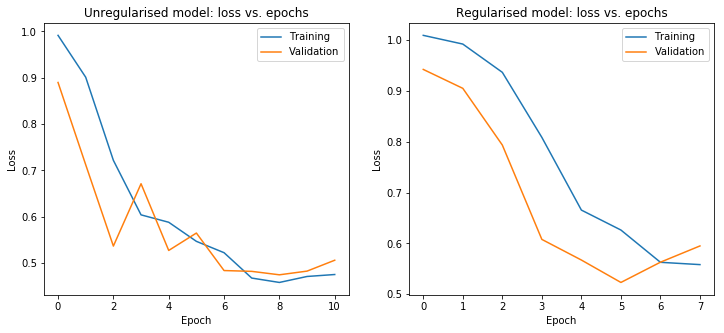

In [41]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()